In [1]:
from spec_id import Gen_spec, Scale_model, Median_w_Error_cont, Iterative_stacking
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import grizli
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
lzDB = galDB.query('z_grism < 1.16')
mzDB = galDB.query('1.16 < z_grism < 1.3')
hzDB = galDB.query('1.3 < z_grism < 1.45')
uhzDB = galDB.query('1.45 < z_grism')


metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
dust=np.round(np.arange(0.0,1.1,0.1),1)
M,A=np.meshgrid(metal,age)

In [3]:
galDB

,gids,z_grism,z_grism_+,z_grism_-,Z,Z_l,Z_h,Zx,Zx_l,Zx_h,...,taux_l,taux_h,d,d_l,d_h,dx,dx_l,dx_h,l_mass,SNR
0,n16758,1.015,0.002405,0.002405,0.024,0.007,0.004,0.023547,0.006228,0.004657,...,0.217872,0.229976,0.1,0.084,0.038,0.058116,0.042084,0.080160,10.83,10.905958
1,n17070,1.175,0.004810,0.014429,0.021,0.008,0.006,0.020741,0.007687,0.006285,...,0.229976,0.338912,0.2,0.154,0.073,0.138277,0.092184,0.134269,10.92,5.969465
2,n21156,1.249,0.002405,0.002405,0.017,0.006,0.005,0.016533,0.005948,0.005948,...,0.139196,0.175508,0.4,0.174,0.133,0.368737,0.142285,0.164329,11.16,16.705723
3,n21427,1.506,0.072144,0.021643,0.018,0.009,0.008,0.017543,0.008641,0.008305,...,0.169456,0.223924,0.5,0.288,0.211,0.432866,0.220441,0.278557,10.73,3.082104
4,n23435,1.139,0.004810,0.007214,0.014,0.008,0.011,0.013896,0.008192,0.010774,...,0.242080,0.338912,0.4,0.218,0.255,0.384770,0.202405,0.270541,10.27,4.719428
5,n23758,1.161,0.004810,0.002405,0.012,0.009,0.011,0.011483,0.008641,0.011222,...,0.242080,0.211820,1.0,0.224,-0.024,0.909820,0.134269,0.066132,10.97,12.416562
6,n32566,1.148,0.004810,0.002405,0.023,0.010,0.005,0.022032,0.009034,0.005723,...,0.338912,0.326808,0.4,0.232,0.193,0.352705,0.184369,0.240481,10.61,6.895487
7,n34694,1.145,0.002405,0.002405,0.023,0.007,0.004,0.022369,0.006846,0.004882,...,0.121040,0.193664,0.3,0.166,0.109,0.260521,0.126253,0.148297,10.94,10.649954
8,n37686,1.256,0.001000,0.002405,0.012,0.005,0.008,0.011539,0.004657,0.008192,...,0.169456,0.236028,0.6,0.251,0.143,0.537074,0.188377,0.206413,10.89,9.291758
9,n37955,1.027,0.004810,0.002405,0.025,0.010,0.003,0.024108,0.009202,0.004377,...,0.314704,0.211820,0.7,0.313,0.156,0.631263,0.244489,0.224449,10.85,7.722264


In [3]:
print(np.median(lzDB['SNR']))
print(np.median(mzDB['SNR']))
print(np.median(hzDB['SNR']))
print(np.median(uhzDB['SNR']))

8.578583538598942
9.29175838484961
5.559989823718639
3.0821039783673823


In [4]:
print((np.min(lzDB['z_grism']) + np.max(lzDB['z_grism'])) / 2)
print((np.min(mzDB['z_grism']) + np.max(mzDB['z_grism'])) / 2)
print((np.min(hzDB['z_grism']) + np.max(hzDB['z_grism'])) / 2)
print((np.min(uhzDB['z_grism']) + np.max(uhzDB['z_grism'])) / 2)

1.0815
1.2085
1.369
1.5590000000000002


In [5]:
print(np.min(lzDB['z_grism']))
print(np.max(uhzDB['z_grism']))

1.015
1.612


In [6]:
print(galDB['z_grism'][13])
print(galDB['z_grism'][20]) 
print(galDB['z_grism'][22]) 
print(galDB['z_grism'][26])

1.023
1.221
1.328
1.611


In [18]:
# spec1 = Gen_spec(galDB['gids'][220], 1.082, delayed=True,maxwv=11400)
# spec2 = Gen_spec(galDB['gids'][61], 1.217, delayed=True,maxwv=11400)
# spec3 = Gen_spec(galDB['gids'][232], 1.369, delayed=True,maxwv=11400)
# spec4 = Gen_spec(galDB['gids'][248], 1.636, delayed=True,maxwv=11400)

spec1 = Gen_spec(galDB['gids'][20], 1.082)
spec2 = Gen_spec(galDB['gids'][20], 1.209)
spec3 = Gen_spec(galDB['gids'][20], 1.369)
spec4 = Gen_spec(galDB['gids'][20], 1.560)

spec1.Sim_spec(0.019,2.2,8.0)
spec2.Sim_spec(0.019,2.2,8.0)
spec3.Sim_spec(0.019,2.2,8.0)
spec4.Sim_spec(0.019,2.2,8.0)


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

In [19]:
def Sig_int(er):
    sig = np.zeros(len(er)-1)
    
    for i in range(len(er)-1):
        sig[i] = np.sqrt(er[i]**2 + er[i+1]**2 )
    
    return np.sum((1/2)*sig)


def SNR(wv,fl,er):
    IDX = [U for U in range(len(wv)) if 7900 < wv[U] < 11100]
    return np.trapz(fl[IDX])/ Sig_int(er[IDX])

print(SNR(spec1.gal_wv,spec1.fl,spec1.o_er))
print(SNR(spec2.gal_wv,spec2.fl,spec2.o_er))
print(SNR(spec3.gal_wv,spec3.fl,spec3.o_er))
print(SNR(spec4.gal_wv,spec4.fl,spec4.o_er))




20.14515794022055
18.969690289289275
17.343945562550495
16.1620823597291


In [20]:
def SNR_correct(wave,flux,error,SNR_desired): 
    sno = SNR(wave,flux,error)
    return sno / SNR_desired

print(SNR_correct(spec1.gal_wv,spec1.fl,spec1.o_er,10))
print(SNR_correct(spec2.gal_wv,spec2.fl,spec2.o_er,10))
print(SNR_correct(spec3.gal_wv,spec3.fl,spec3.o_er,10))
print(SNR_correct(spec4.gal_wv,spec4.fl,spec4.o_er,10))

2.014515794022055
1.8969690289289276
1.7343945562550496
1.6162082359729102


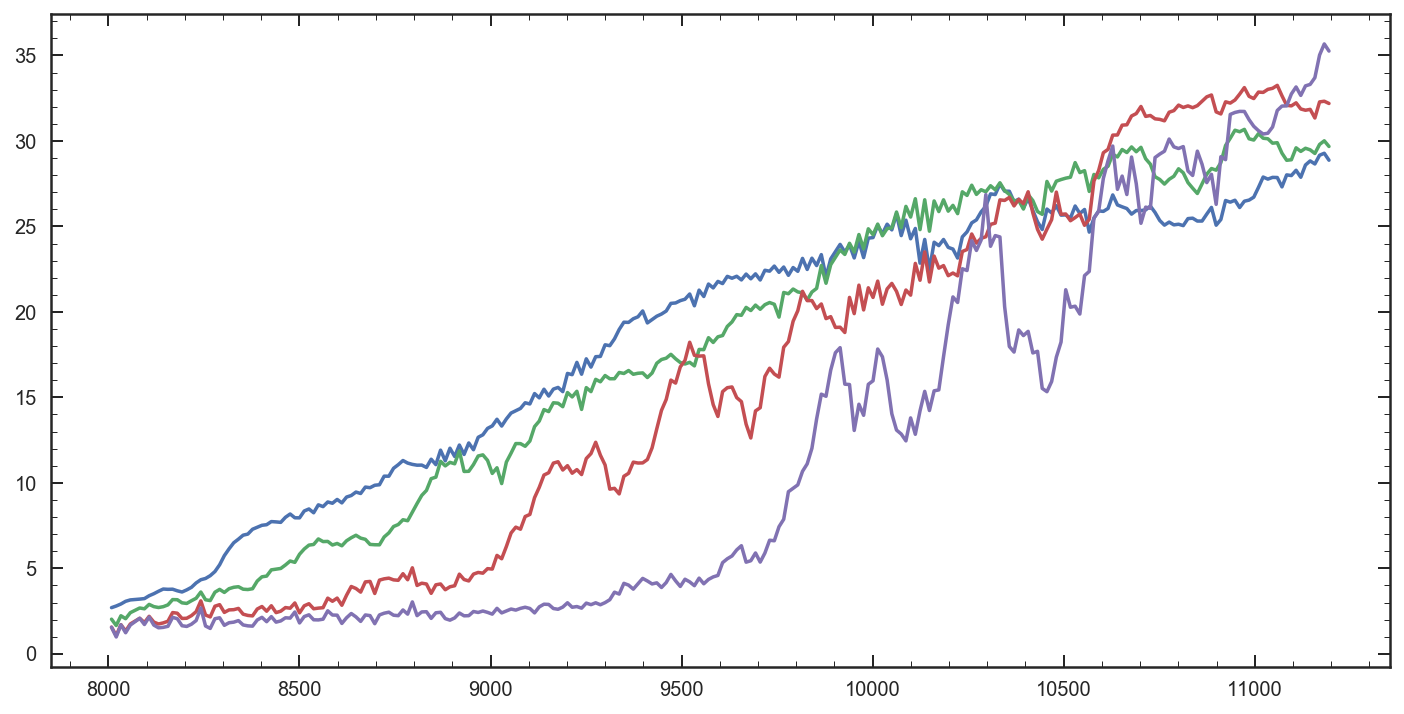

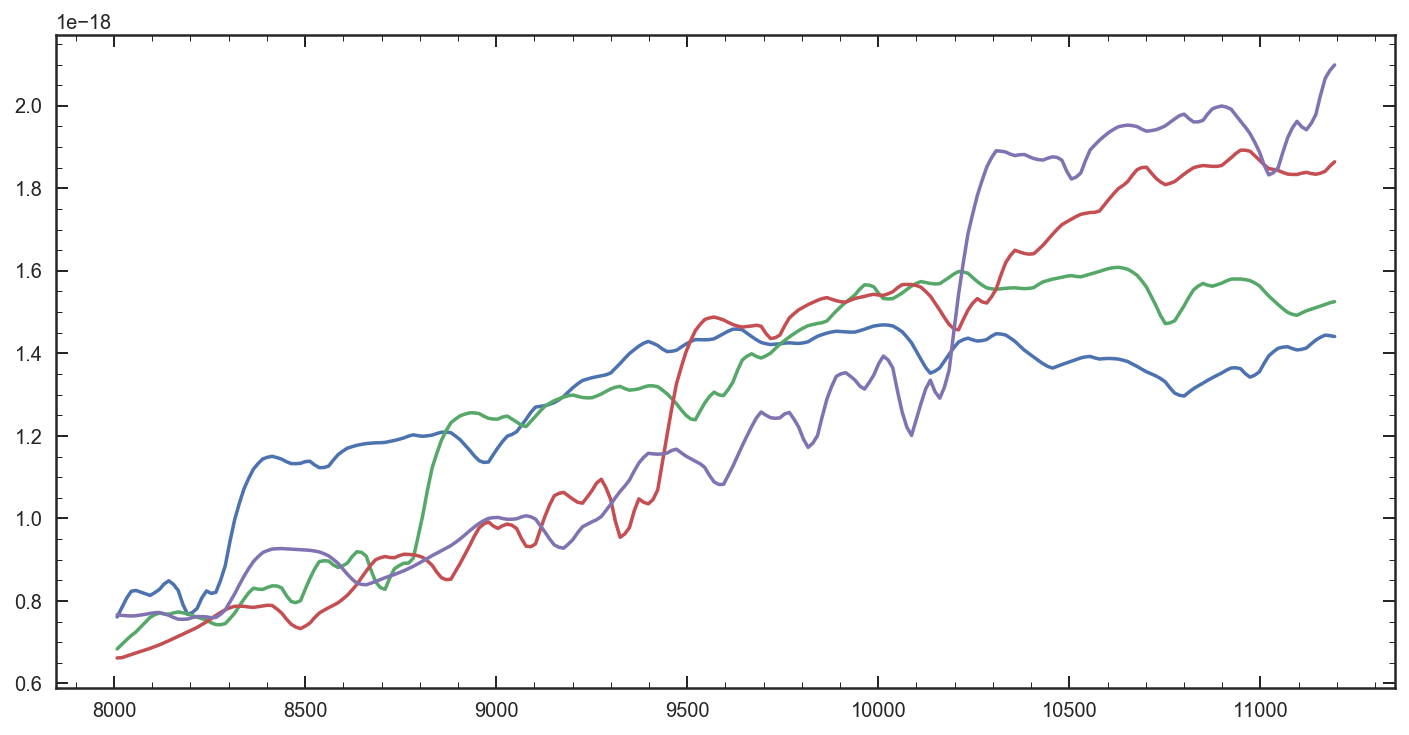

In [24]:
plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/(spec1.gal_er ))
plt.plot(spec2.gal_wv,(spec2.fl)/(spec2.gal_er ))
plt.plot(spec3.gal_wv,(spec3.fl)/(spec3.gal_er ))
plt.plot(spec4.gal_wv,(spec4.fl)/(spec4.gal_er ))
# plt.axvspan(10500, 11400, alpha = 0.5)

plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/2.014515794022055)
plt.plot(spec2.gal_wv,spec2.fl/ 1.8969690289289276)
plt.plot(spec3.gal_wv,spec3.fl/ 1.7343945562550496)
plt.plot(spec4.gal_wv,spec4.fl/ 1.6162082359729102)


<ErrorbarContainer object of 3 artists>

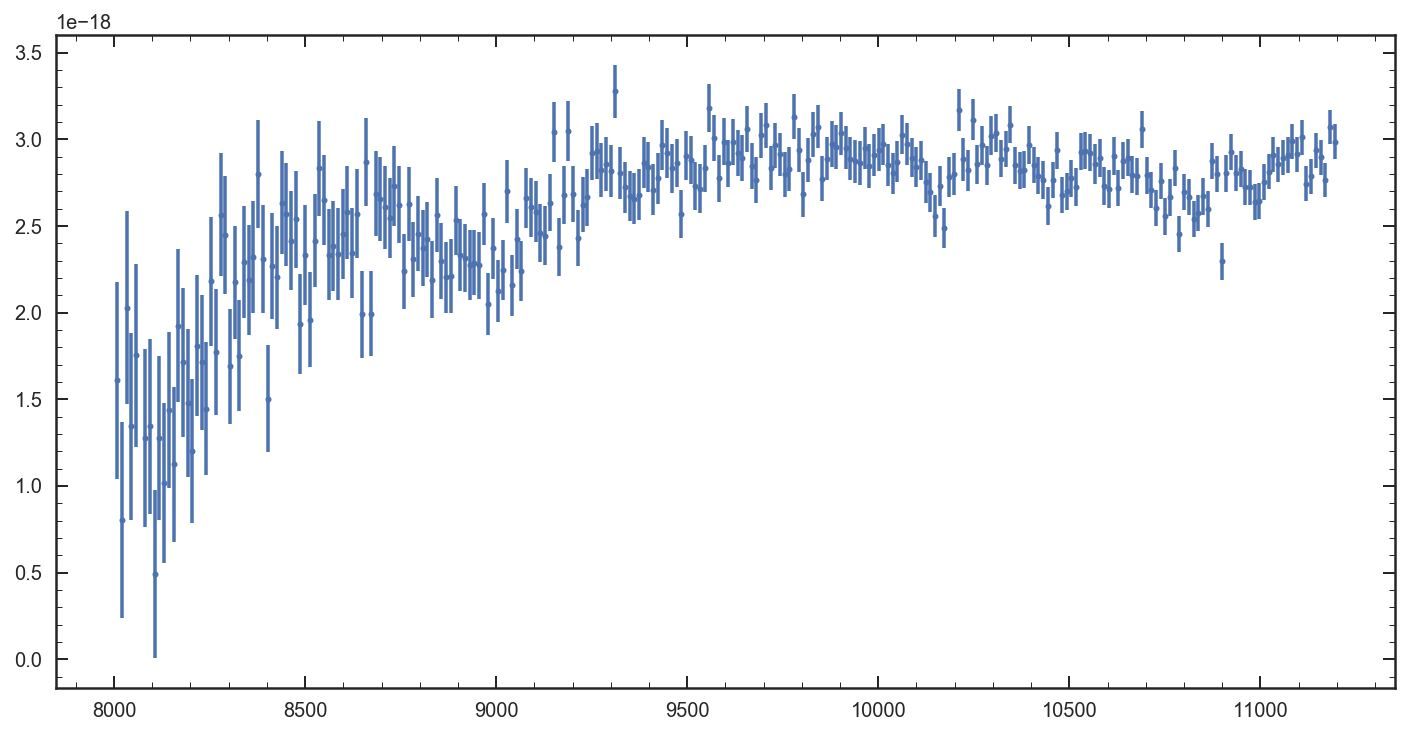

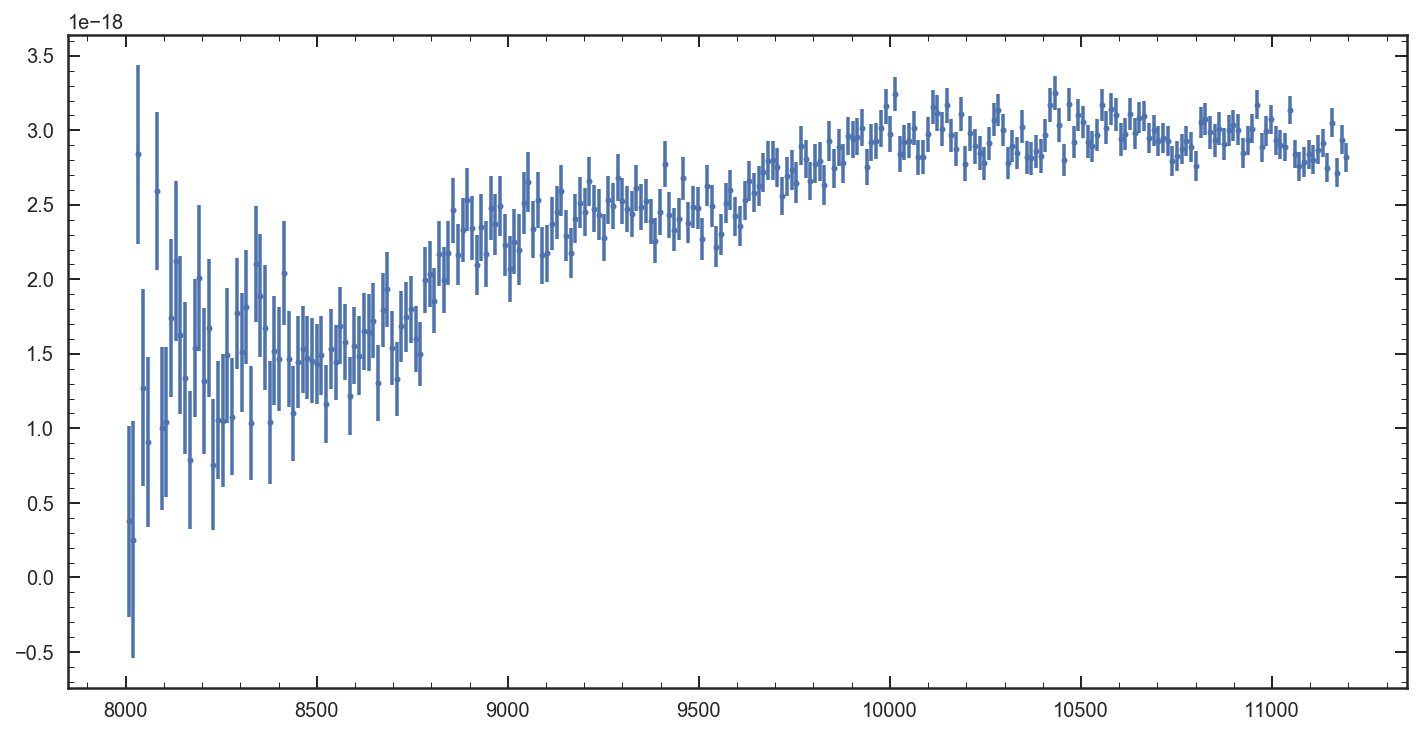

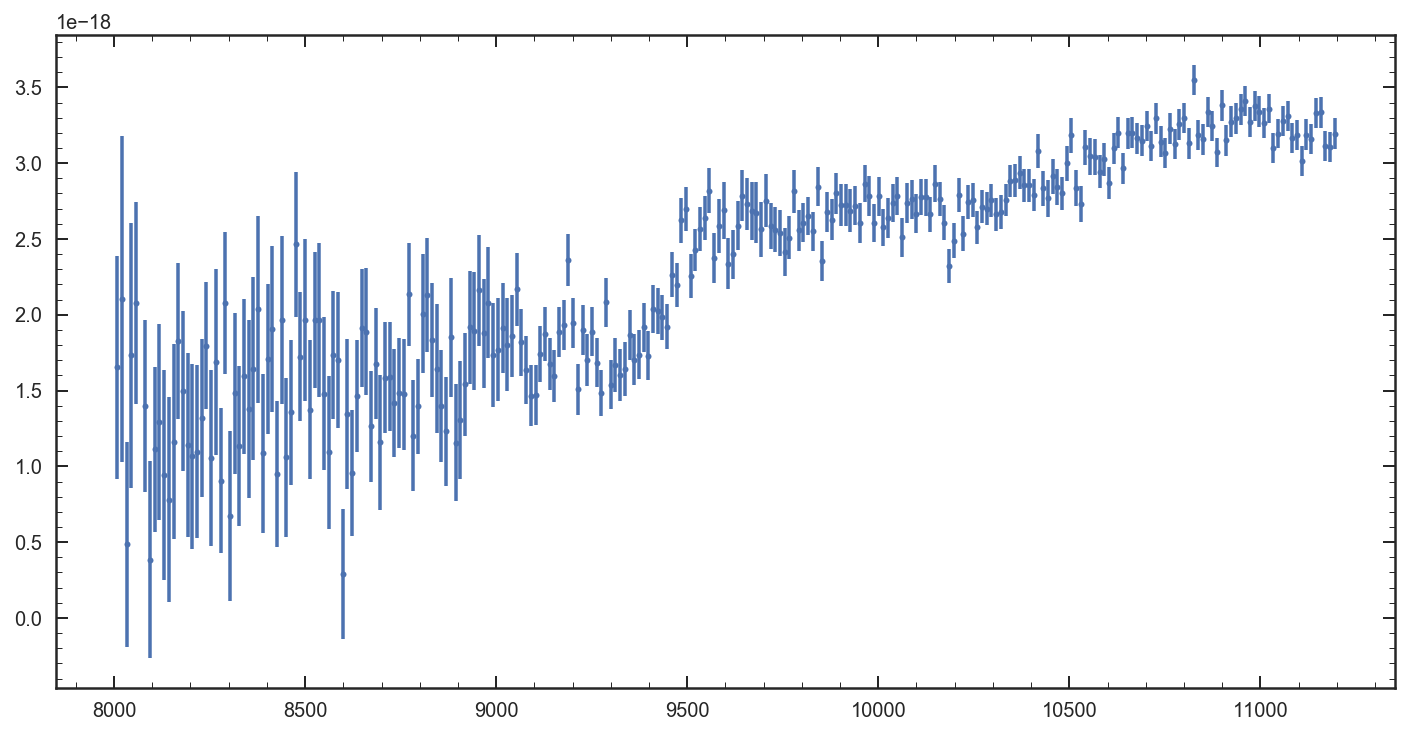

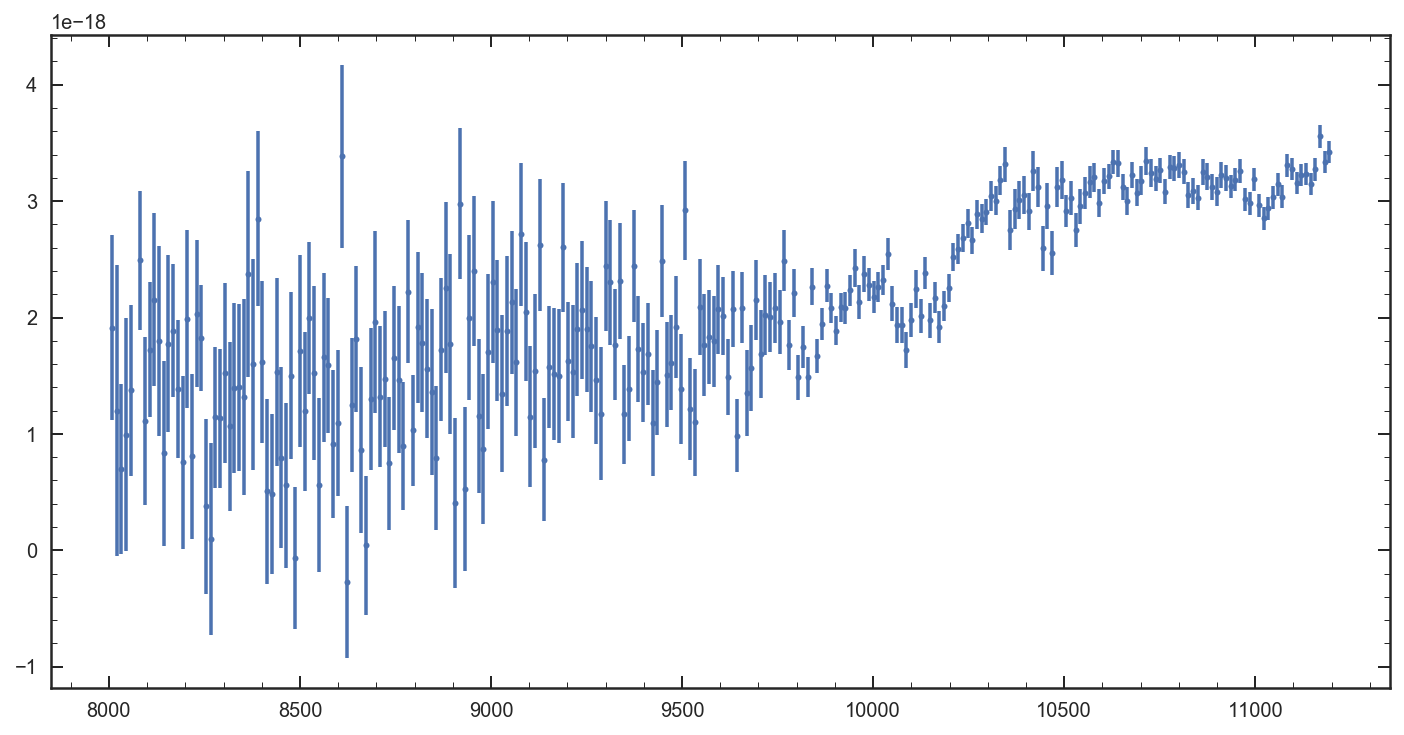

In [31]:
plt.figure(figsize=[12,6])
plt.errorbar(spec1.gal_wv,spec1.fl + np.random.normal(0,spec1.gal_er),spec1.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec2.gal_wv,spec2.fl + np.random.normal(0,spec2.gal_er),spec2.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec3.gal_wv,spec3.fl + np.random.normal(0,spec3.gal_er),spec3.gal_er, linestyle='None', marker='o', markersize=3)

plt.figure(figsize=[12,6])
plt.errorbar(spec4.gal_wv,spec4.fl + np.random.normal(0,spec4.gal_er),spec4.gal_er, linestyle='None', marker='o', markersize=3)


In [31]:
sn_array = [2,4,8,12,16]
m_array = [0.008,0.012,0.015,0.019,0.021,0.025]
a_array = [3.0,4.5,3.3,5.2,3.5,5.8]

for i in range(len(m_array)):
    spec1.Sim_spec(m_array[i],a_array[i],8.7)
    spec2.Sim_spec(m_array[i],a_array[i],8.7)
    spec3.Sim_spec(m_array[i],a_array[i],8.7)
    spec4.Sim_spec(m_array[i],a_array[i],8.7)
    for ii in range(len(sn_array)):
        C1 =SNR_correct(spec1.gal_wv,spec1.fl,spec1.gal_er,sn_array[ii])
        C2 =SNR_correct(spec2.gal_wv,spec2.fl,spec2.gal_er,sn_array[ii])
        C3 = SNR_correct(spec3.gal_wv,spec3.fl,spec3.gal_er,sn_array[ii])
        C4 = SNR_correct(spec4.gal_wv,spec4.fl,spec4.gal_er,sn_array[ii])
        
        slrm_text=["#!/bin/bash\n#SBATCH -J MC_fit-{0!s}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o mfit{0!s}-%j.out\n\
#SBATCH -e mfit{0!s}-%j.err\n\nchmod a+x C_MC_fit.py\n\n\
python C_MC_fit.py 's39170' 1.082 {1!s} {2!s} {3!s} {4!s} &\npython C_MC_fit.py 'n21156' 1.217 {1!s} {2!s} {3!s} {5!s} &\n\
python C_MC_fit.py 's40862' 1.369 {1!s} {2!s} {3!s} {6!s} &\n\
python C_MC_fit.py 's44042' 1.636 {1!s} {2!s} {3!s} {7!s} &\n\
\nwait\n\nexit 0".format(i*len(sn_array) + ii +1, m_array[i],a_array[i],sn_array[ii],C1,C2,C3,C4)]
        
        np.savetxt('../mcerr/MC_fit_{0!s}.slrm'.format(i*len(sn_array) + ii +1),slrm_text,fmt='%s')

# Rework MC fit

In [15]:
def Sig_int(er):
    sig = np.zeros(len(er)-1)
    
    for i in range(len(er)-1):
        sig[i] = np.sqrt(er[i]**2 + er[i+1]**2 )
    
    return np.sum((1/2)*sig)

def SNR(wv,fl,er):
    IDX = [U for U in range(len(wv)) if 7900 < wv[U] < 11200]
    return np.trapz(fl[IDX])/ Sig_int(er[IDX])

def SNR_correct(wave,flux,error,SNR_desired): 
    sno = SNR(wave,flux,error)
    return sno / SNR_desired

def Calzetti(Av,lam):
    lam = lam * 1E-4
    Rv=4.05
    k = 2.659*(-2.156 +1.509/(lam) -0.198/(lam**2) +0.011/(lam**3)) + Rv
    cal = 10**(-0.4*k*Av/Rv)    
    return cal

def Stich_spec(grids):
    stc = []
    for i in range(len(grids)):
        stc.append(np.load(grids[i]))       
    stc = np.array(stc)
    return stc.reshape([stc.shape[0] * stc.shape[1],stc.shape[2]])


def Gen_mflgrid(fit_wv, fit_flat, metal, galaxy, specz,dataset):
    ##### set model wave
    #wave, fl = np.load('/fdata/scratch/vestrada78840/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
    #    0.019, 2.0, 8.0))
        
    wave, fl = np.load( '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
            0.019, 2.0, 8.0))
    
    tmp_spec = Gen_sim(galaxy, 0.019,2.0,8.0,specz,0,10)
    mwv, dummy = tmp_spec.Sim_spec_mult(wave, fl, specz)
    
    #############Read in spectra#################    
    #files = ['/fdata/scratch/vestrada78840/chidat/spec_files/{0}_m{1}.npy'.format(dataset,U) for U in metal]
    files = ['../chidat/spec_files/{0}_m{1}.npy'.format(dataset,U) for U in metal]
    mfl = Stich_spec(files)
    print(mfl.shape)
    mfl = np.ma.masked_invalid(mfl)
    mfl.data[mfl.mask] = 0
    print(mfl.data.shape)
    print(mwv.shape)
    print(fit_wv.shape)
    mfl = interp2d(mwv, range(len(mfl.data)),mfl.data)(fit_wv,range(len(mfl.data)))
    return mfl / fit_flat

def Gen_dust_minigrid(fit_wv,rshift):
    dust_dict = {}
    Av = np.round(np.arange(0, 1.1, 0.1),1)
    for i in range(len(Av)):
        key = str(Av[i])
        minigrid = np.zeros([len(rshift),len(fit_wv)])
        for ii in range(len(rshift)):
            minigrid[ii] = Calzetti(Av[i],fit_wv / (1 + rshift[ii]))
        dust_dict[key] = minigrid
    return dust_dict
         
def Redden(mfl, dustgrid, fit_fl, fit_er, metal, age, tau):
    Av = np.round(np.arange(0, 1.1, 0.1),1)
    fullgrid=[]
    for i in range(len(Av)):
        dustgrid = np.repeat([dust[str(Av)]], len(metal)*len(age)*len(tau), axis=0).reshape(
            [len(dust[str(Av)])*len(metal)*len(age)*len(tau), len(dust[str(Av)])])
        redflgrid = mfl * dustgrid
        SCL = Scale_model_mult(fit_fl,fit_er,redflgrid)
        fullgrid.append(np.array([SCL]).T*redflgrid)
        
    return fullgrid
        
def Analyze_full_fit(redflgrid,fit_fl, fit_er, metal, age, tau, rshift, convtable, overhead, dust = np.arange(0,1.1,0.1)):
    
    ####### Get maximum age
    max_age = Oldest_galaxy(max(rshift))
    
    ####### Read in file   
    chi = np.sum(((fit_fl - redflgrid) / fit_er) ** 2, axis=1).reshape([len(dust),len(metal), len(age), len(tau), len(rshift)])
    chi[ : , : , len(age[age <= max_age]):] = 1E5
    ultau = np.append(0, np.power(10, np.array(tau)[1:] - 9))

    ######## get Pd and Pz
    P_full = np.exp(- chi / 2).astype(np.float128)
    P = np.trapz(P_full, rshift, axis=4)
    P = np.trapz(P.T, dust, axis=3).T
    new_P = np.zeros(P.T.shape)

    ######## Reshape likelihood to get light weighted age instead of age when marginalized
    for i in range(len(tau)):
        frame = np.zeros([metal.size,age.size])
        for ii in range(metal.size):
            dist = interp1d(convtable.T[i].T[ii],P.T[i].T[ii])(age[:-overhead[i][ii]])
            frame[ii] = np.append(dist,np.repeat(0, overhead[i][ii]))
        new_P[i] = frame.T

    ####### Create normalize probablity marginalized over tau
    P = new_P.T

    # test_prob = np.trapz(test_P, ultau, axis=2)
    C = np.trapz(np.trapz(np.trapz(P, ultau, axis=2), age, axis=1), metal)
    P /= C
    prob = np.trapz(P, ultau, axis=2)
    
    # #### Get Z, t, tau, and z posteriors
    PZ = np.trapz(np.trapz(P, ultau, axis=2), age, axis=1)
    Pt = np.trapz(np.trapz(P, ultau, axis=2).T, metal, axis=1)

    return PZ, Pt

def MC_fit(galaxy, metal, age, tau, redshift, dust, sim_m, sim_a, sim_t, sim_z, sim_d, sn, dataset, specz, name, repeats=1000,
                    #age_conv='/fdata/scratch/vestrada78840/data/light_weight_scaling_3.npy'):
                     age_conv='../data/light_weight_scaling_3.npy'):
    
    ######## set paramter output arrays
    PZlist = np.zeros([repeats,metal.size])
    Ptlist = np.zeros([repeats,age.size])
    mlist = np.zeros(repeats)
    alist = np.zeros(repeats)

    ultau = np.append(0, np.power(10, np.array(tau[1:]) - 9))
    
    ######## create sim

    spec = Gen_sim(galaxy, sim_m, sim_a, sim_t, sim_z, sim_d, sn)

    ####### set up lwa
    convtable = np.load(age_conv)

    overhead = np.zeros([len(tau),metal.size]).astype(int)
    for i in range(len(tau)):
        for ii in range(metal.size):
            amt=[]
            for iii in range(age.size):
                if age[iii] > convtable.T[i].T[ii][-1]:
                    amt.append(1)
            overhead[i][ii] = sum(amt)

    ####### Generate model grid
    mflgrid = Gen_mflgrid(spec.gal_wv, spec.filt, metal, galaxy, specz,dataset)
         
    ####### Generate dust minigrid
    dstgrid = Gen_dust_minigrid(spec.gal_wv,redshift)
        
    ###### redden grid  
    redgrid = Redden(mflgrid, dstgrid, spec.gal_fl, spec.gal_er, metal, age, tau)
        
    for xx in range(repeats):
        spec.Perturb_flux()
        
        PZlist[xx], Ptlist[xx] = Analyze_full_fit(redgrid,spec.flx_err, spec.gal_er, metal, age, tau, 
                                                  redshift,convtable, overhead)

        mlist[xx],ml,mh = Median_w_Error_cont(PZ,metal)
        alist[xx],ml,mh = Median_w_Error_cont(Pt,age)

    #np.save('/home/vestrada78840/mcerr/PZ_' + name, PZlist)
    #np.save('/home/vestrada78840/mcerr/Pt_' + name, Ptlist)
    #np.save('/home/vestrada78840/mcerr/' + name, [mlist, alist])

    np.save('../mcerr/PZ_' + name, PZlist)
    np.save('../mcerr/Pt_' + name, Ptlist)
    np.save('../mcerr/' + name, [mlist, alist])
    
    return

class Gen_sim(object):
    def __init__(self, galaxy_id, sim_metal, sim_age, sim_tau, sim_z, sim_dust, sn, minwv = 7900, maxwv = 11200, shift = 1):
        self.galaxy_id = galaxy_id
        self.gid = int(self.galaxy_id[1:])
        self.sim_metal = sim_metal
        self.sim_age = sim_age
        self.sim_tau = sim_tau
        self.sn = sn
        self.sim_z = sim_z
        self.sim_dust = sim_dust
        self.shift = shift
        
        #gal_wv, gal_fl, gal_er = np.load(glob('/fdata/scratch/vestrada78840/stack_specs/*{0}*'.format(self.gid))[0])
        #self.flt_input = glob('/fdata/scratch/vestrada78840/clear_q_beams/*{0}*'.format(self.gid))[0]

        gal_wv, gal_fl, gal_er = np.load(glob('../spec_stacks/*{0}*'.format(self.gid))[0])
        self.flt_input = glob('../beams/*{0}*'.format(self.gid))[0]
        
        IDX = [U for U in range(len(gal_wv)) if minwv <= gal_wv[U] <= maxwv]

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.sim_z)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
        self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
        self.gal_er = self.gal_er[self.gal_fl > 0 ]
        self.gal_fl = self.gal_fl[self.gal_fl > 0 ]
        self.o_er = np.array(self.gal_er)
       
        #WV,TEF = np.load('/fdata/scratch/vestrada78840/data/template_error_function.npy')
        WV,TEF = np.load('../data/template_error_function.npy')
        iTEF = interp1d(WV,TEF)(self.gal_wv_rf)
        self.gal_er = np.sqrt(self.gal_er**2 + (iTEF*self.gal_fl)**2)

        snc = SNR_correct(self.gal_wv, self.gal_fl, self.o_er, self.sn)
        self.gal_fl /= snc
        
        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(fits_file=self.flt_input)

        ## Get sensitivity function
        flat = self.beam.flat_flam.reshape(self.beam.beam.sh_beam)
        fwv, ffl, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,flat.shape[0]]),flat.T[:-1],axis=0).T , bin=0)
        IDT = [U for U in range(len(fwv)) if 7800 <= fwv[U] <= 11500] 
        self.IDT = IDT
        self.filt = interp1d(fwv, ffl)(self.gal_wv)

        ## set mask for continuum removal
        m2r = [3175, 3280, 3340, 3515, 3550, 3650, 3710, 3770, 3800, 3850,
               3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

        Mask = np.zeros(len(self.gal_wv_rf))
        for i in range(len(Mask)):
            for ii in range(len(m2r)//2):
                if m2r[ii * 2] <= self.gal_wv_rf[i] <= m2r[ii*2 + 1]:
                    Mask[i] = 1
        
        self.maskw = np.ma.masked_array(self.gal_wv_rf, Mask)
        params = np.ma.polyfit(self.maskw, self.gal_fl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_gal_fl = self.gal_fl / C0
        self.nc_gal_er = self.gal_er / C0
        self.nc_o_er = self.o_er / C0
                        
        self.Set_spec()    

    def Perturb_flux(self,fl,err):
        return np.abs(fl + np.random.normal(0, err))

    def Interp_and_scale(self, w, f, influx):
        
        ifl = interp1d(w,f)(self.gal_wv)
        adj_ifl = ifl /self.filt
        
        C = Scale_model(influx, self.gal_er, adj_ifl)

        return C * adj_ifl
        
    def Sim_spec_mult(self, wave, fl, model_redshift):
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[wave*(1+model_redshift), fl])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(np.append(np.zeros([self.shift,self.beam.model.shape[0]]),
                                                           self.beam.model.T[:-1],axis=0).T , bin=0)
        
        return w[self.IDT],f[self.IDT]

    def Rm_cont(self, fl):
        params = np.ma.polyfit(self.maskw, fl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)  
        return fl / C0
    
    def Set_spec(self):
        #wave, fl = np.load('/fdata/scratch/vestrada78840/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
        #    metal, age, tau))
        
        wave, fl = np.load( '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
            self.sim_metal, self.sim_age, self.sim_tau))

        cal = Calzetti(self.sim_dust,wave)
        
        w,f = self.Sim_spec_mult(wave, fl*cal, self.sim_z)

        self.fl = self.Interp_and_scale(w, f, self.gal_fl)
        self.flx_err = self.Perturb_flux(self.fl, self.gal_er)

        self.nc_fl = self.Rm_cont(self.fl)
        self.nc_flx_err = self.Perturb_flux(self.nc_fl, self.nc_gal_er)
     
    def Sim_spec(self, metal, age, tau, model_redshift = 0, dust = 0, no_cont = False):
        if model_redshift ==0:
            model_redshift = self.sim_z
        
        #wave, fl = np.load('/fdata/scratch/vestrada78840/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
        #    metal, age, tau))
        
        wave, fl = np.load('../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
            metal, age, tau))

        cal = Calzetti(dust,wave)
        
        w,f = self.Sim_spec_mult(wave, fl*cal, model_redshift)

        self.fl = self.Interp_and_scale(w, f, self.flx_err)
        if no_cont:
            self.nc_fl = self.Rm_cont(self.fl)


In [18]:
wave, fl = np.load( '../../../fsps_models_for_fit/fsps_spec/m{0}_a{1}_dt{2}_spec.npy'.format(
        0.019, 2.0, 8.0))

tmp_spec = Gen_sim('s40597', 0.019,2.0,8.0,1.221,0,10)
mwv, dummy = tmp_spec.Sim_spec_mult(wave, fl, 1.221)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

In [5]:
metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
mtest=np.round(np.arange(0.002,0.031,0.008),3)
atest=np.arange(.5,6.1,.5)
tau_test=[0,8.0, 8.3, 8.48, 8.6]
ztest = np.array([1.219,1.220])

In [37]:
x = np.random.rand(50,135)

y=[]
for i in range(3):
    y.extend(x)


In [38]:
np.array(y).shape

(150, 135)

In [30]:
len(mtest)*len(atest)*len(tau_test)*len(ztest)

480

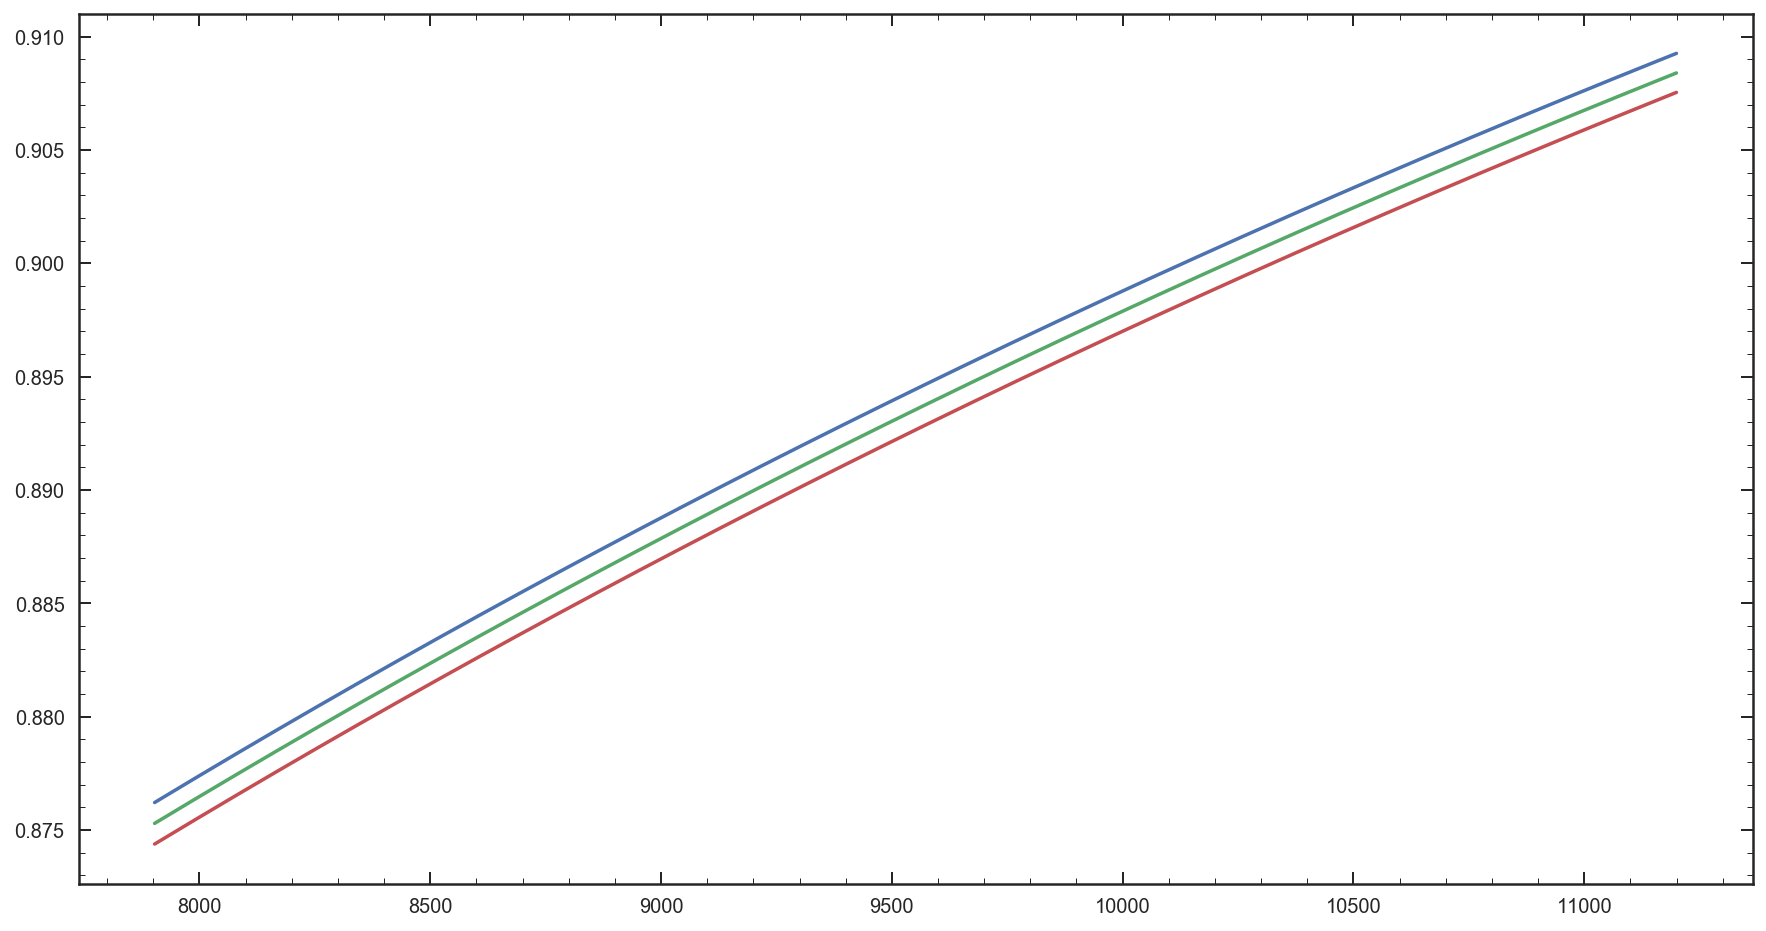

In [50]:
plt.figure(figsize=[15,8])
plt.plot(spec.gal_wv,test['0.1'][0])
plt.plot(spec.gal_wv,test['0.1'][1]*1)
plt.plot(spec.gal_wv,test['0.1'][2]*1)

In [61]:
out = Calzetti(0.5,np.arange(3000,5600))

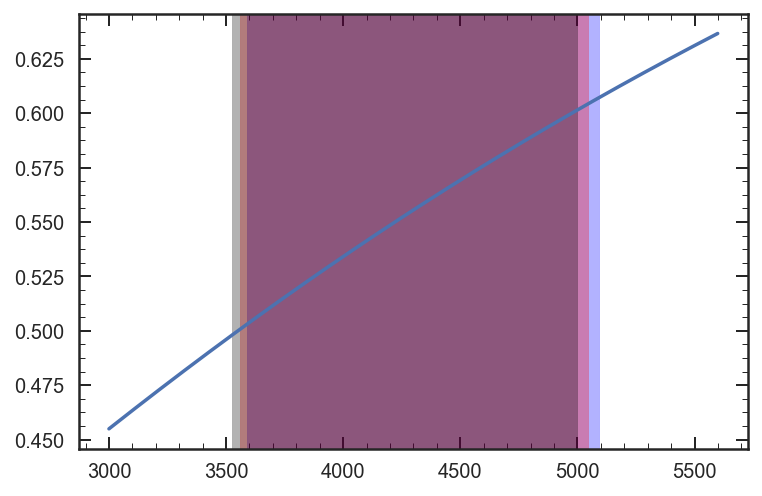

In [66]:
plt.plot(np.arange(3000,5600),out)
plt.axvspan(7900 / 2.2,11200 / 2.2, alpha = .3, color ='b')
plt.axvspan(7900 / 2.22,11200 / 2.22, alpha = .3, color ='r')
plt.axvspan(7900 / 2.24,11200 / 2.24, alpha = .3, color ='k')

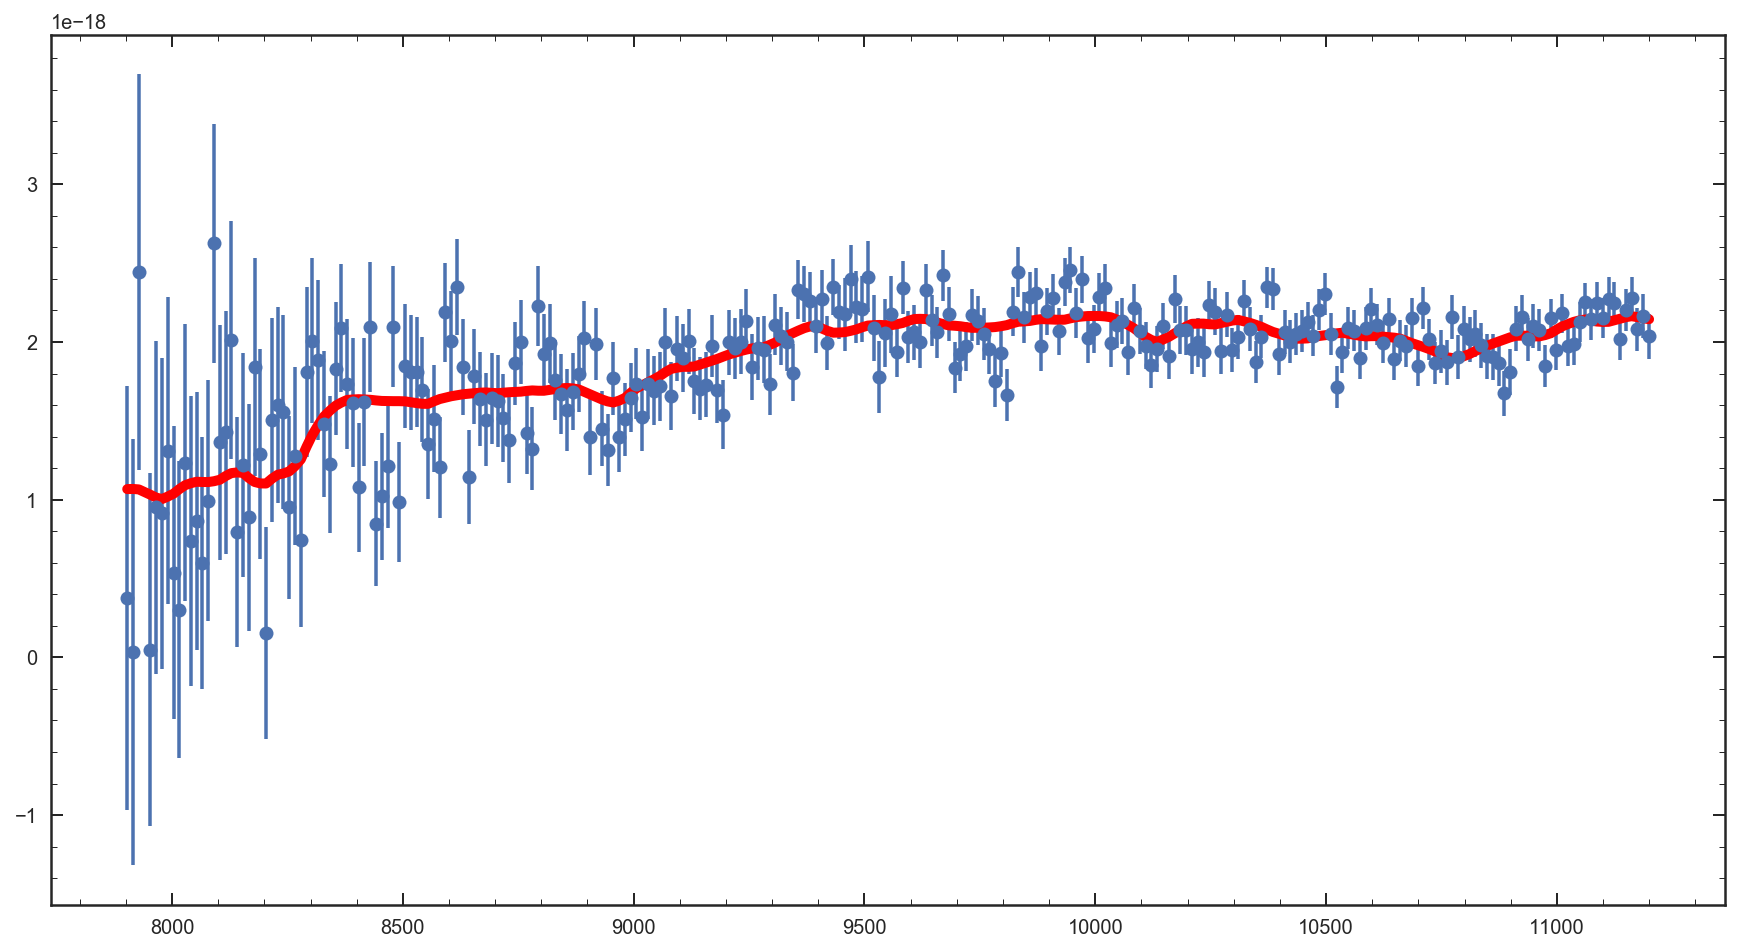

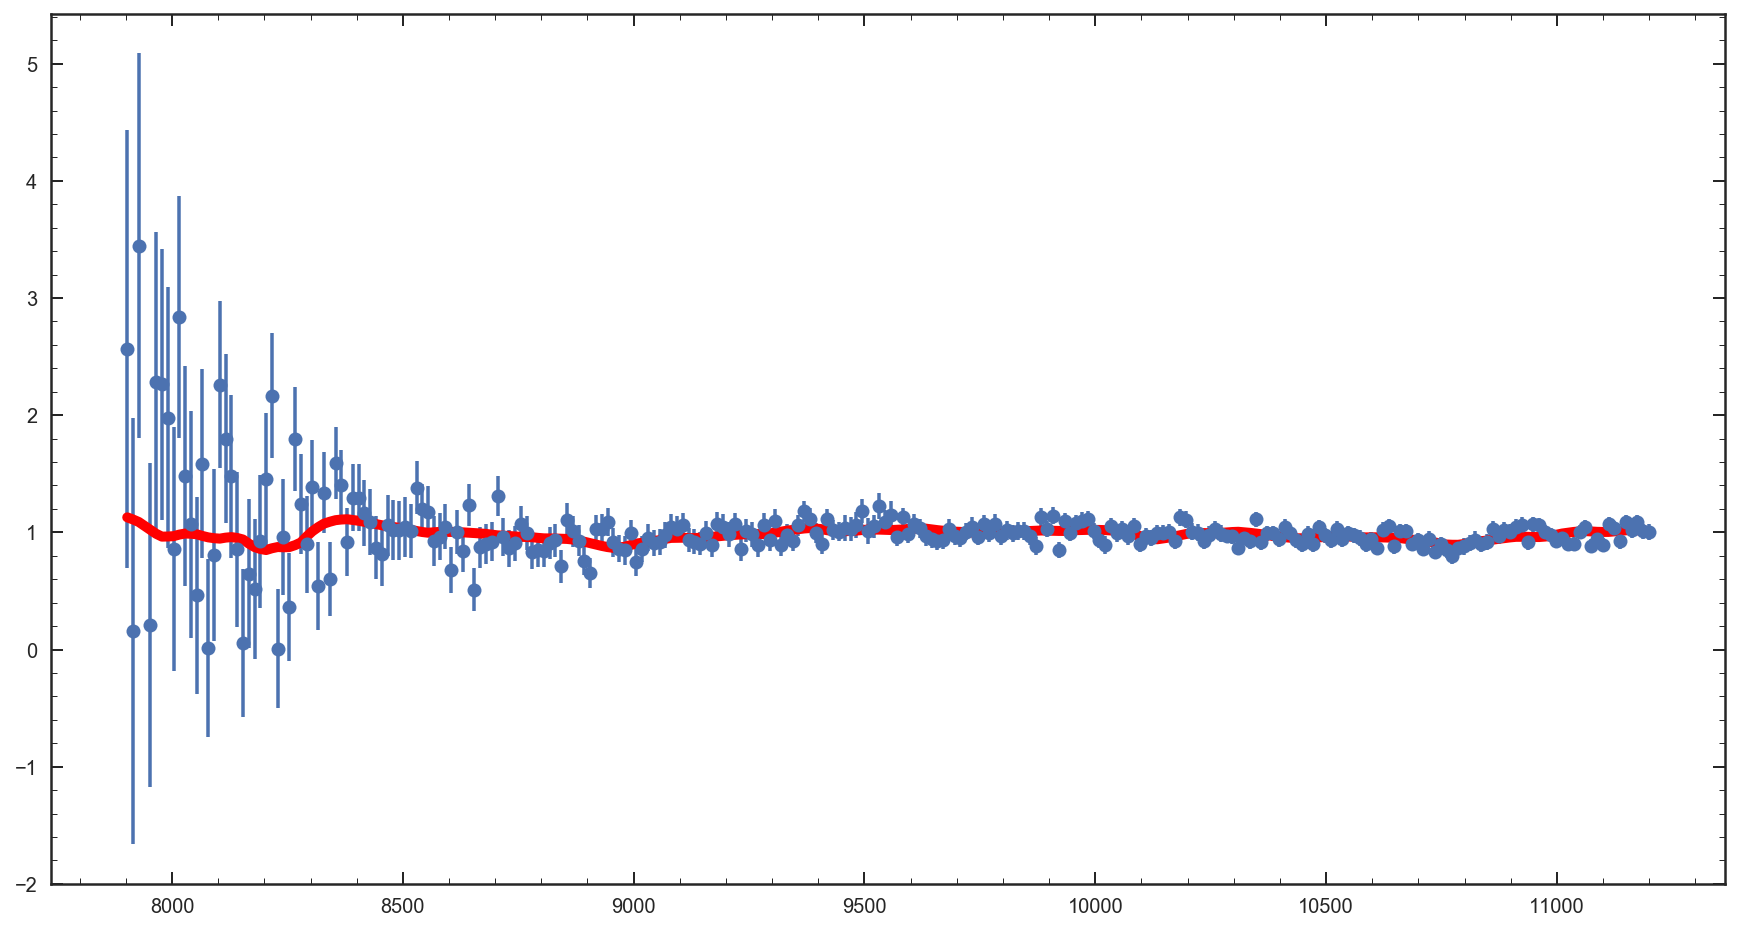

In [99]:
plt.figure(figsize=[15,8])
plt.errorbar(spec.gal_wv,spec.flx_err,spec.gal_er,fmt = 'o')
plt.plot(spec.gal_wv,spec.fl,'r',linewidth=5)

plt.figure(figsize=[15,8])
plt.errorbar(spec.gal_wv,spec.nc_flx_err,spec.nc_gal_er,fmt = 'o')
plt.plot(spec.gal_wv,spec.nc_fl,'r',linewidth=5)

In [3]:
PZtest = np.load('../mcerr/PZ_MC_test.npy')
Pttest = np.load('../mcerr/Pt_MC_test.npy')
mlist, alist = np.load('../mcerr/MC_test.npy')

In [5]:
mstk,mwstk = Iterative_stacking(PZtest,metal,3,extend=True)

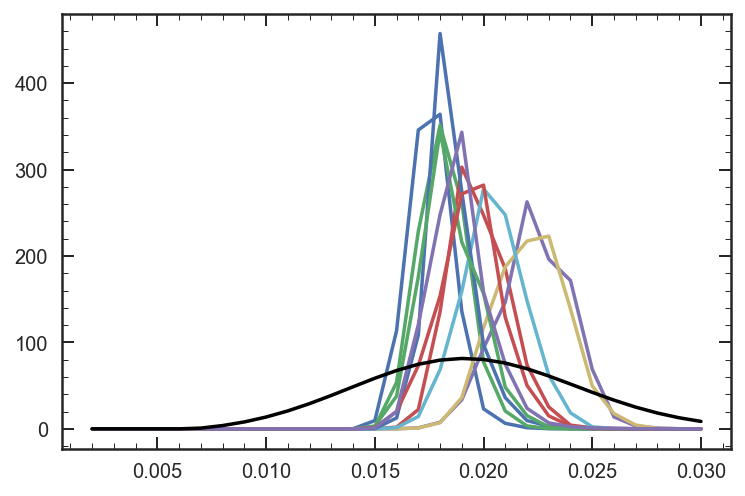

In [7]:
plt.plot(metal,PZtest.T)
plt.plot(metal,mstk,'k')

In [8]:
astk,awstk = Iterative_stacking(Pttest,age,1,extend=False,resampling=250)

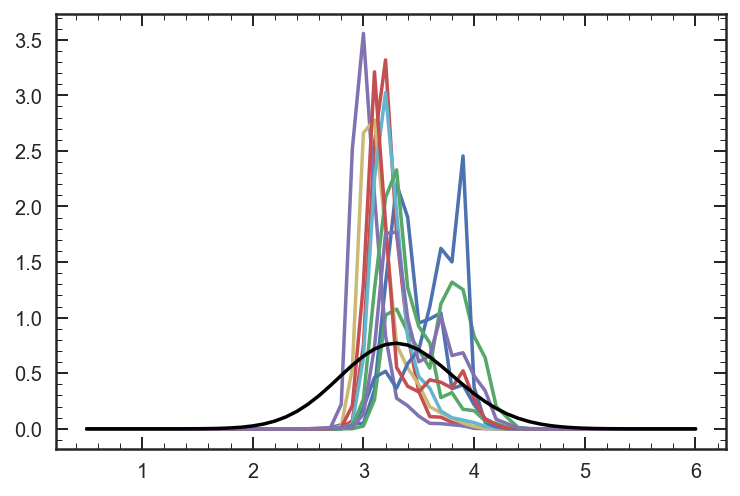

In [9]:
plt.plot(age,Pttest.T)
plt.plot(age,astk,'k')

In [10]:
mmed,mler,mher = Median_w_Error_cont(mstk,metal)
amed,aler,aher = Median_w_Error_cont(astk,age)

[0, 0.03, 0, 6]

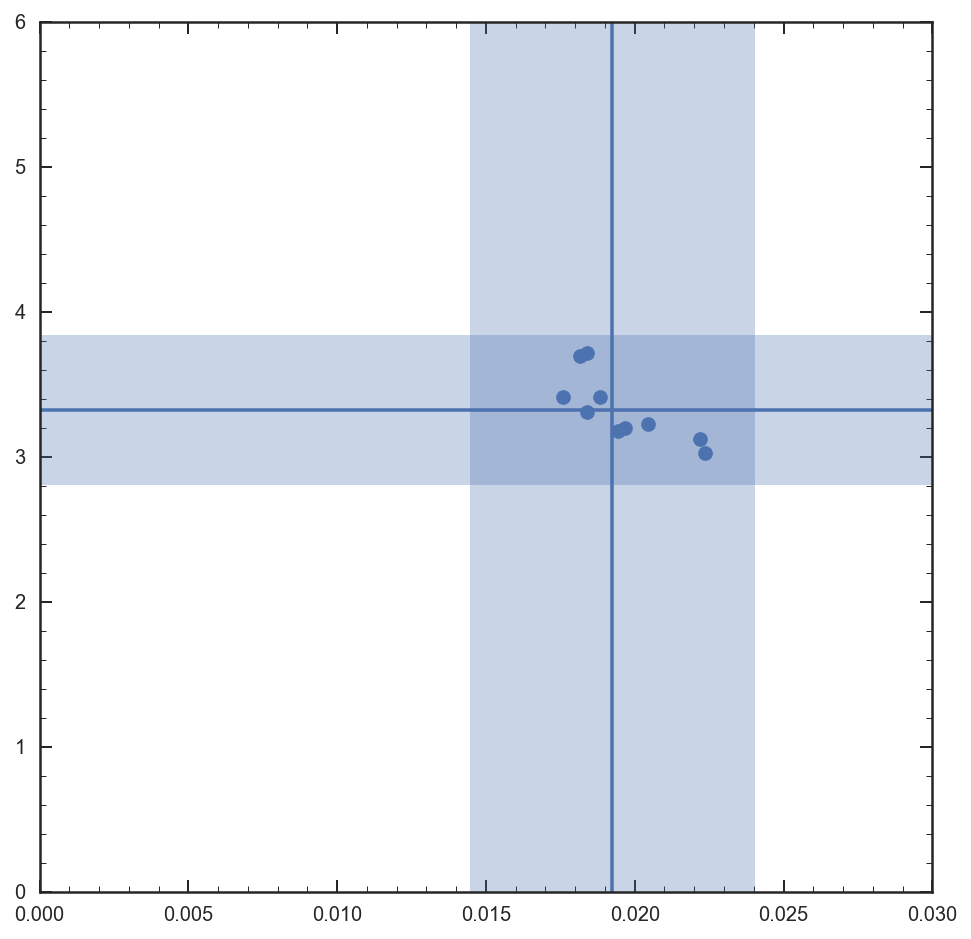

In [11]:
plt.figure(figsize=[8,8])
plt.scatter(mlist, alist)
plt.axvline(mmed)
plt.axvspan(mmed-mler,mmed+mher,alpha=.3)
plt.axhline(amed)
plt.axhspan(amed-aler,amed+aher,alpha=.3)
plt.axis([0,0.03,0,6])

In [44]:
lwa= np.load('../data/light_weight_scaling_3.npy')

In [52]:
lwa[17][15][1]

1.7965258725175188

In [51]:
tau[1]

8.0

In [53]:
mtest

array([0.002, 0.01 , 0.018, 0.026])